# Flight Price Prediction Project

In [2]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Reading excel file
df = pd.read_excel("Flight_Prices.xlsx")
df

,Unnamed: 0,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,1,Go First,22:30,00:40,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,2,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,3,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
4,4,Go First,13:45,19:40,5h 55m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
...,...,...,...,...,...,...,...,...,...,...
1587,1587,SpiceJet,14:20,23:15,8h 55m,Kolkata,Mumbai,eCash 250,1 Stop,"7,801"
1588,1588,Air India,23:50,02:35,2h 45m,Kolkata,Mumbai,eCash 250,Non Stop,"7,958"
1589,1589,IndiGo,04:55,07:45,2h 50m,Kolkata,Mumbai,eCash 250,Non Stop,"7,958"
1590,1590,IndiGo,16:30,19:20,2h 50m,Kolkata,Mumbai,eCash 250,Non Stop,"7,958"


In [4]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,Go First,22:30,00:40,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
4,Go First,13:45,19:40,5h 55m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"


In [5]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 1592 rows and 9 columns in our dataframe


In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')


In [7]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Airline,7
Departure_time,197
Time_of_arrival,216
Duration,340
Source,7
Destination,9
Meal_availability,6
Number_of_stops,5
Price,431


In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1592 non-null   object
 1   Departure_time     1592 non-null   object
 2   Time_of_arrival    1592 non-null   object
 3   Duration           1592 non-null   object
 4   Source             1592 non-null   object
 5   Destination        1592 non-null   object
 6   Meal_availability  1592 non-null   object
 7   Number_of_stops    1592 non-null   object
 8   Price              1592 non-null   object
dtypes: object(9)
memory usage: 112.1+ KB


In [9]:
# Checking null values in the dataset
df.isnull().sum()

Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

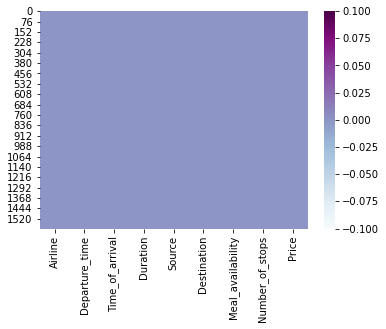

In [10]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuPu")
plt.show()

In [11]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*80)

Air India    536
IndiGo       486
Vistara      316
Go First     131
SpiceJet      93
Air Asia      26
StarAir        4
Name: Airline, dtype: int64
********************************************************************************
07:05    35
13:20    33
06:30    31
16:20    28
06:10    28
         ..
16:40     1
13:25     1
18:45     1
20:25     1
10:40     1
Name: Departure_time, Length: 197, dtype: int64
********************************************************************************
20:55    35
20:45    33
19:10    33
20:00    33
21:35    31
         ..
06:55     1
07:05     1
06:40     1
03:15     1
10:35     1
Name: Time_of_arrival, Length: 216, dtype: int64
********************************************************************************
2h 15m     34
2h 10m     27
2h 45m     25
1h 10m     23
1h 15m     19
           ..
0h 50m      1
28h 20m     1
19h 00m     1
20h 05m     1
22h 25m     1
Name: Duration, Length: 340, dtype: int64
*****************************************************

In [12]:
# Converting columns from object type to Datetime Type
df["Departure_time"] = pd.to_datetime(df["Departure_time"])
df["Time_of_arrival"] = pd.to_datetime(df["Time_of_arrival"])

In [13]:
#Checking the data types of all columns again
df.dtypes

Airline                      object
Departure_time       datetime64[ns]
Time_of_arrival      datetime64[ns]
Duration                     object
Source                       object
Destination                  object
Meal_availability            object
Number_of_stops              object
Price                        object
dtype: object

In [14]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Time_of_arrival"]-df["Departure_time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

In [15]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Departure_time column
df["Departure_Hour"] = pd.to_datetime(df["Departure_time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Departure_time"]).dt.minute

In [16]:
# Dropping Departure_time column
df.drop("Departure_time",axis=1,inplace=True)

In [17]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Time_of_arrival column
df["Arrival_Hour"] = pd.to_datetime(df["Time_of_arrival"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Time_of_arrival"]).dt.minute

# Dropping Arrival_Time column
df.drop("Time_of_arrival",axis=1,inplace=True)

In [18]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

In [19]:
# Replacing "eCash250" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')

# Grouping the entries with same meaning
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

In [20]:
# Replacing categorical values with numeric data
df.Number_of_stops.replace({"Non Stop": 0,"1 Stop": 1,"2 Stop(s)": 2,"3 Stop(s)": 3,"4 Stop(s)": 4},inplace = True)

In [21]:
# Checking dataset again
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,8,45,10,55
1,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,22,30,0,40
2,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,14,20,16,35
3,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,21,0,23,15
4,Go First,5.916667,New Delhi,Mumbai,None,1,5954.0,13,45,19,40
...,...,...,...,...,...,...,...,...,...,...,...
1587,SpiceJet,8.916667,Kolkata,Mumbai,None,1,7801.0,14,20,23,15
1588,Air India,2.750000,Kolkata,Mumbai,None,0,7958.0,23,50,2,35
1589,IndiGo,2.833333,Kolkata,Mumbai,None,0,7958.0,4,55,7,45
1590,IndiGo,2.833333,Kolkata,Mumbai,None,0,7958.0,16,30,19,20


In [22]:
# Checking shape of data after cleaning 
df.shape

(1592, 11)

In [23]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Duration             float64
Source                object
Destination           object
Meal_availability     object
Number_of_stops        int64
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

In [24]:
# Checking the uniqueness of target column
df["Price"].unique()

array([ 5954.,  5955.,  6060.,  6375.,  6848.,  6932.,  7468.,  7908.,
        8160.,  8475.,  8869.,  8892.,  9105.,  9578.,  9630.,  9840.,
        9945.,  9988., 10050., 10260., 10680., 11310., 11900., 11977.,
       12150., 12255., 12859., 12990.,  7423.,  7424.,  7425.,  7426.,
        7530.,  7740.,  9735., 10470., 10523., 10549., 10575., 10785.,
       10828., 11100., 11520., 11616., 12401., 12413., 12518., 12951.,
       13874., 13902., 16140., 16837., 17329., 17963., 18030., 34441.,
       11625., 11629., 11940., 13161., 13935., 14616., 15553., 16317.,
       16876.,  5953.,  6270.,  6386.,  8843.,  8895.,  9590.,  9704.,
       10474., 11231., 11643., 12071., 13026., 13188., 13873., 19605.,
        7531.,  9000.,  9053.,  9538.,  9732., 10081., 10155., 10168.,
       10430., 10618., 12884., 13095., 13410., 15169., 15273., 17462.,
       17567., 18135., 18424., 18555., 19216., 19619.,  3434.,  3435.,
        3645.,  8264., 10544., 14460., 17715.,  2543.,  4275.,  9709.,
      

In [25]:
# Checking whether the target contains any space
df.loc[df['Price']==" "]

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min


In [26]:
# Statistical summary of dataset
df.describe()

,Duration,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,8.712469,1.006281,8760.431533,13.199121,24.811558,15.160176,29.192839
std,6.616167,0.709962,3106.282283,5.186520,17.688439,5.434610,17.895882
min,0.000000,0.000000,2543.000000,0.000000,0.000000,0.000000,0.000000
25%,2.666667,1.000000,6122.000000,9.000000,10.000000,11.000000,15.000000
50%,7.416667,1.000000,8186.000000,13.000000,25.000000,16.000000,30.000000
75%,13.500000,1.000000,10747.000000,17.250000,40.000000,20.000000,45.000000
max,23.916667,4.000000,34441.000000,23.000000,55.000000,23.000000,55.000000


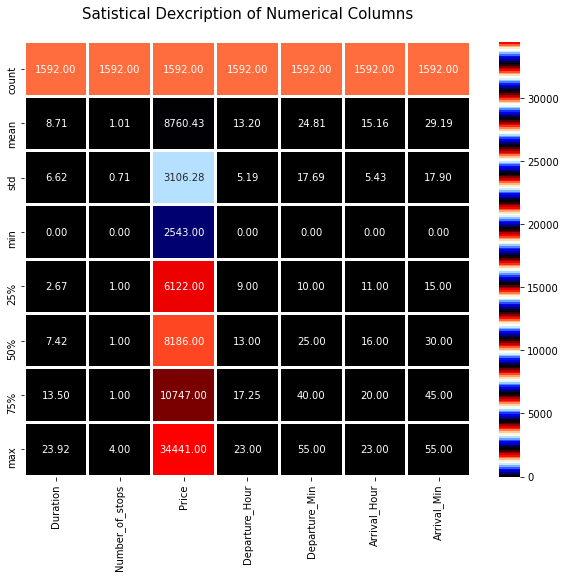

In [27]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="flag_r")
plt.title("Satistical Dexcription of Numerical Columns\n",fontsize=15)

plt.show()

In [28]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_availability']

Numerical columns present in the dataset are:
 ['Duration', 'Number_of_stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


In [ ]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,6))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=20)

# Visualizing the count of Airlines
plt.subplot(1,2,1)
print(df["Airline"].value_counts(),"\n")
plt.title('Count of Various Airlines')
labels = ['Air India', 'Vistara', 'IndiGo', 'Go First', 'Air Asia', 'SpiceJet']
colors = ["m", "green","yellow", "cyan", "maroon", "hotpink"]
df['Airline'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)

# Visualizing the count of Number_of_stops
plt.subplot(1,2,2)
print(df['Number_of_stops'].value_counts())
plt.title('Number of stops present between source and destination')
labels = ['1 stop', '2 stops', 'non-stops', '3 stops', '4 stops']
colors = ["yellowgreen","maroon","hotpink","cyan","red"]
df['Number_of_stops'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

In [ ]:
# Visualizing the availability of meal in the flight
plt.figure(figsize=(6,6))
print(df["Meal_availability"].value_counts())
plt.title('Availability of meal in the flight')
labels = ['Free Meal', 'None']
colors = ["yellowgreen","cyan"]
df['Meal_availability'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

New Delhi    497
Mumbai       269
Hyderabad    200
Bangalore    200
Chennai      200
Goa          196
Kolkata       30
Name: Source, dtype: int64 

Bangalore    259
Kolkata      209
Mumbai       190
Chennai      172
Hyderabad    170
New Delhi    160
Lucknow      156
Jaipur       141
Goa          135
Name: Destination, dtype: int64


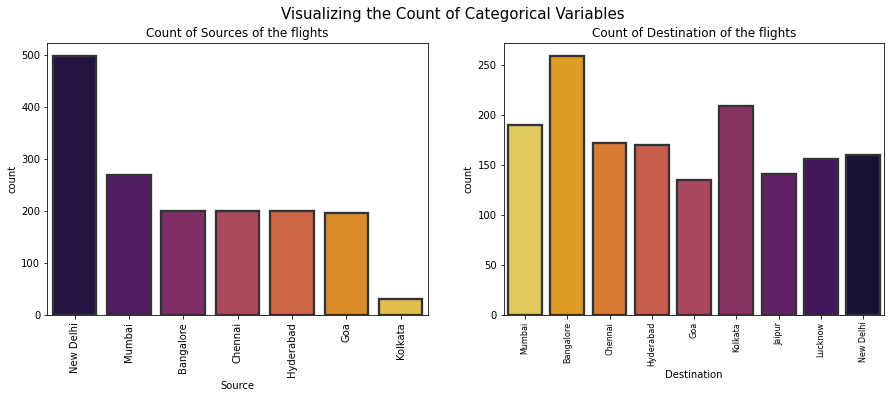

In [36]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=15)

# Visualizing the count of Sources of the flights
plt.subplot(1,2,1)
print(df['Source'].value_counts(),"\n")
plt.title('Count of Sources of the flights')
sns.countplot('Source', data=df, palette="inferno",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)

# Visualizing the count of Destination of the flights
plt.subplot(1,2,2)
print(df['Destination'].value_counts())
plt.title('Count of Destination of the flights')
sns.countplot('Destination', data=df, palette="inferno_r",linewidth=2.3, edgecolor=".2")
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

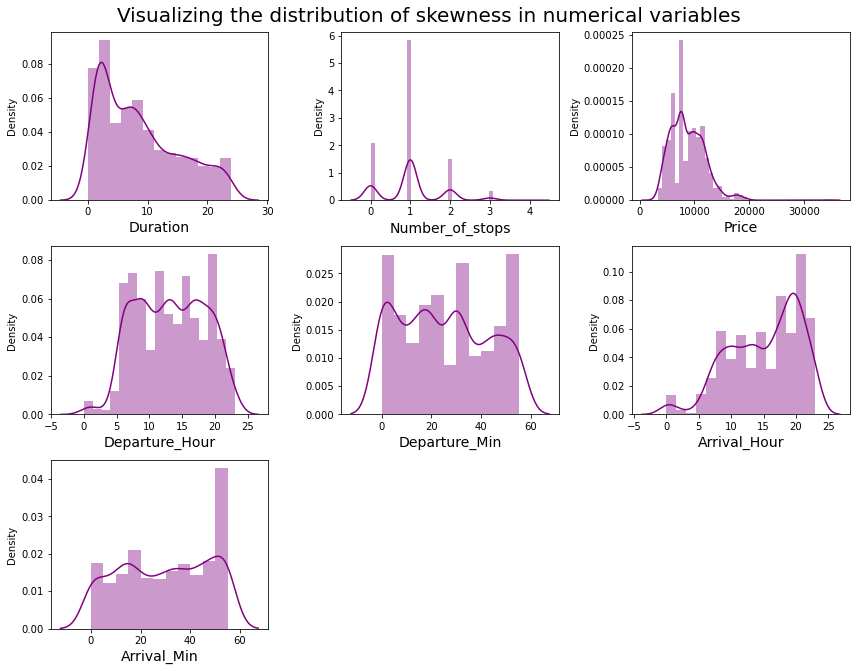

In [37]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

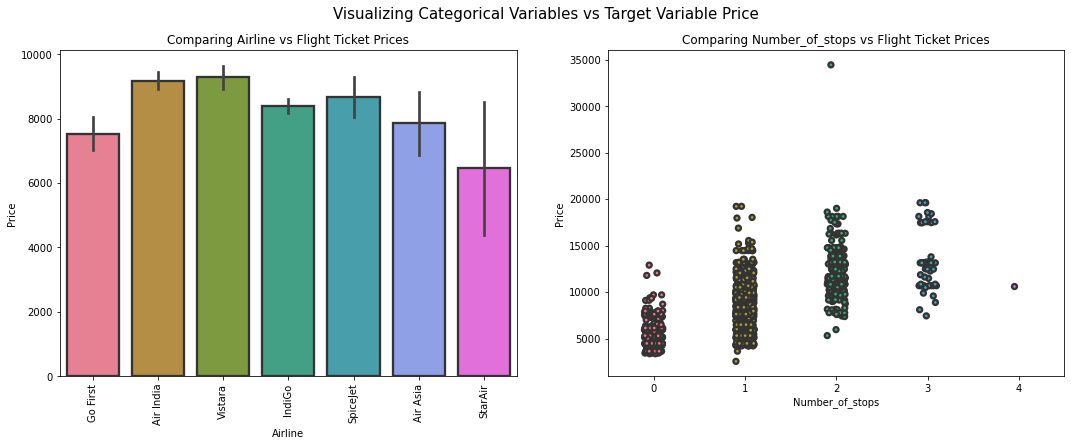

In [38]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# Checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline vs Flight Ticket Prices")
sns.barplot(x= df['Airline'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# Checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Number_of_stops vs Flight Ticket Prices")
sns.stripplot(x = df['Number_of_stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

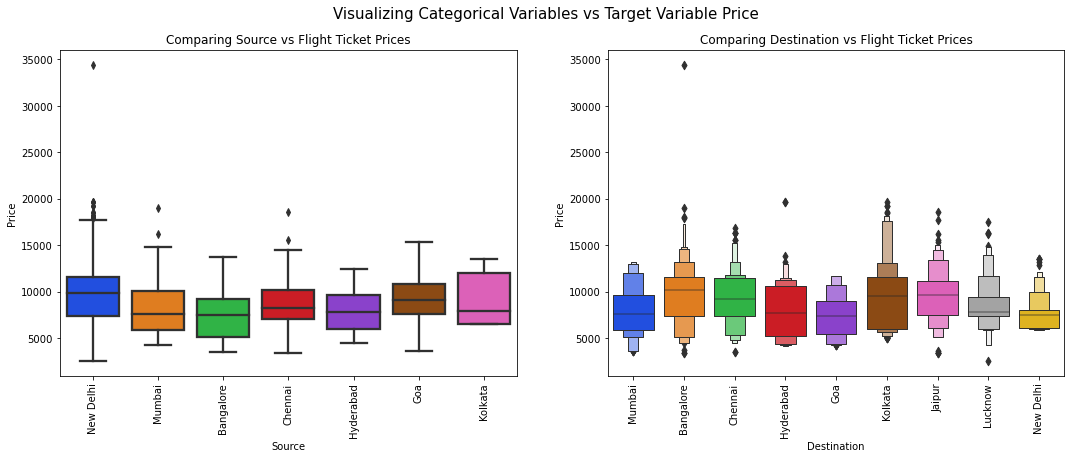

In [39]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['Source'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# Checking how prices changes in each destination 
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

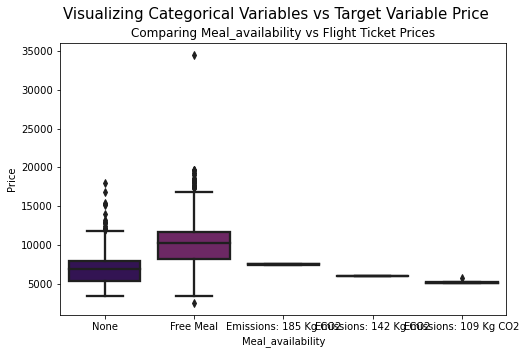

In [40]:
plt.figure(figsize = (8,5))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)
plt.title("Comparing Meal_availability vs Flight Ticket Prices")
sns.boxplot(x= df['Meal_availability'],y= df['Price'],palette = "inferno",linewidth=2.3)
plt.show()

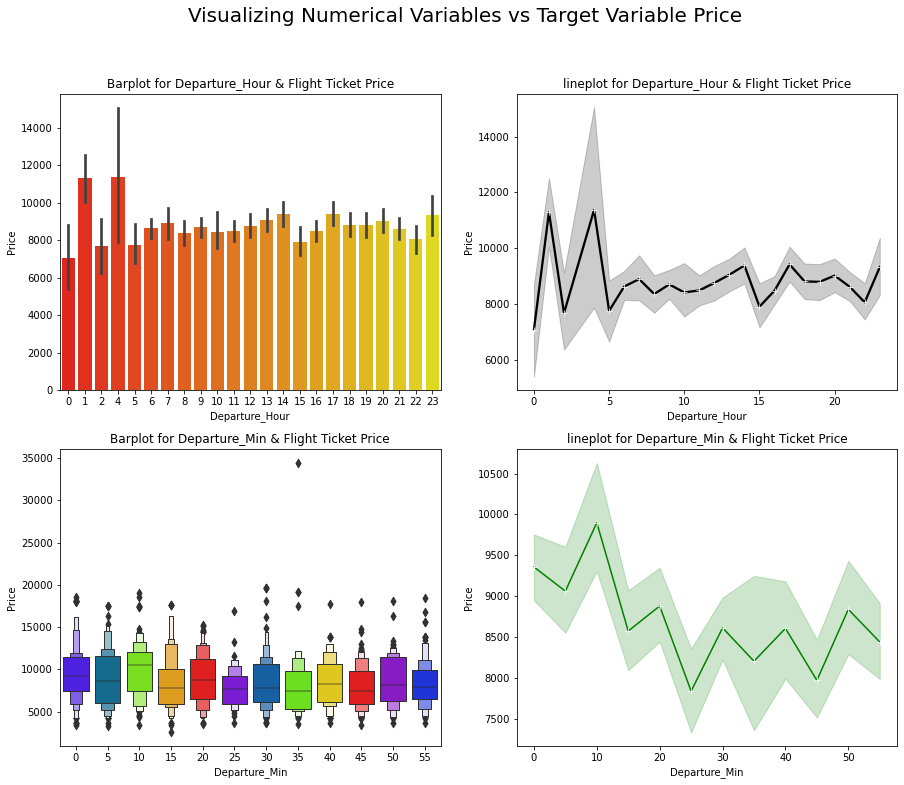

In [41]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['Departure_Hour'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['Departure_Hour'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='Departure_Min',y='Price',data=df,palette = "prism",color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='Departure_Min',y='Price',data=df,marker="+",color='g')

plt.show()

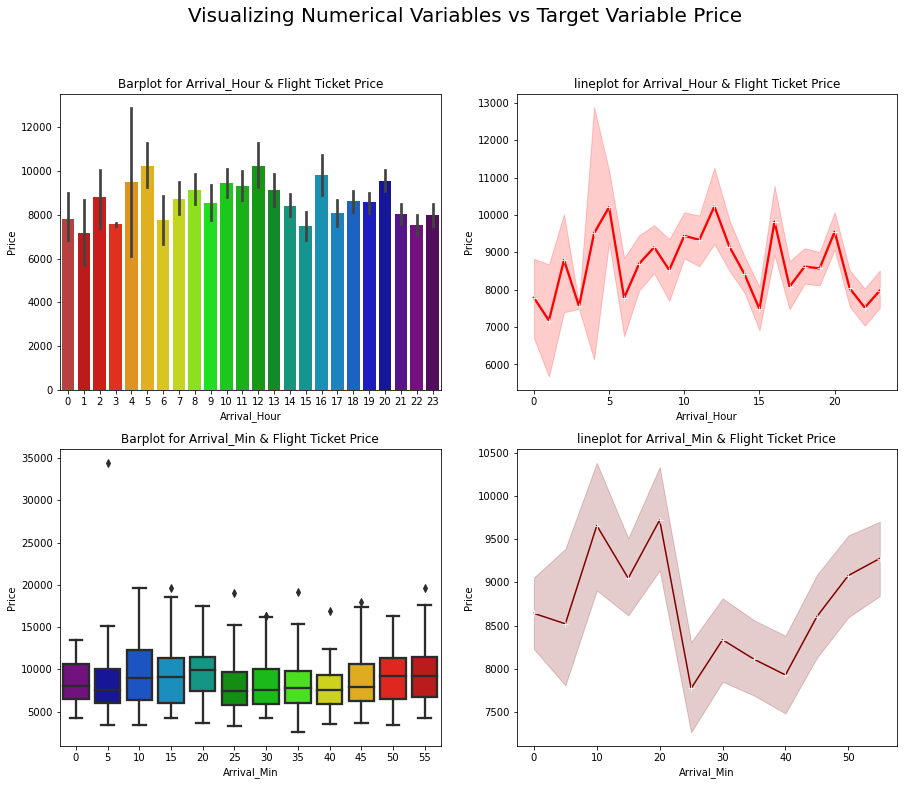

In [42]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Arrival_Hour & Flight Ticket Price")
sns.barplot(x= df['Arrival_Hour'],y= df['Price'],palette = "nipy_spectral_r",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Arrival_Hour & Flight Ticket Price")
sns.lineplot(x = df['Arrival_Hour'],y= df['Price'],marker="+",color='r',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Arrival_Min & Flight Ticket Price")
sns.boxplot(x='Arrival_Min',y='Price',data=df,palette = "nipy_spectral",linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Arrival_Min & Flight Ticket Price")
sns.lineplot(x='Arrival_Min',y='Price',data=df,marker="+",color='maroon')

plt.show()

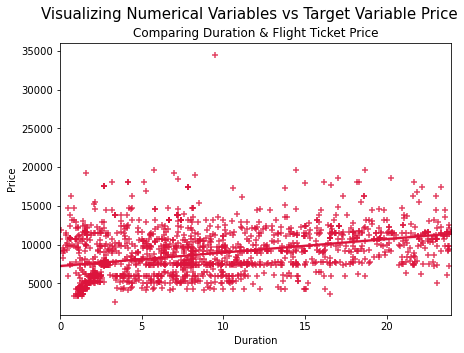

In [43]:
# Visualizing duration and price
plt.figure(figsize = (7,5))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=15)

plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration'],y= df['Price'],marker="+",color='crimson')
plt.show()

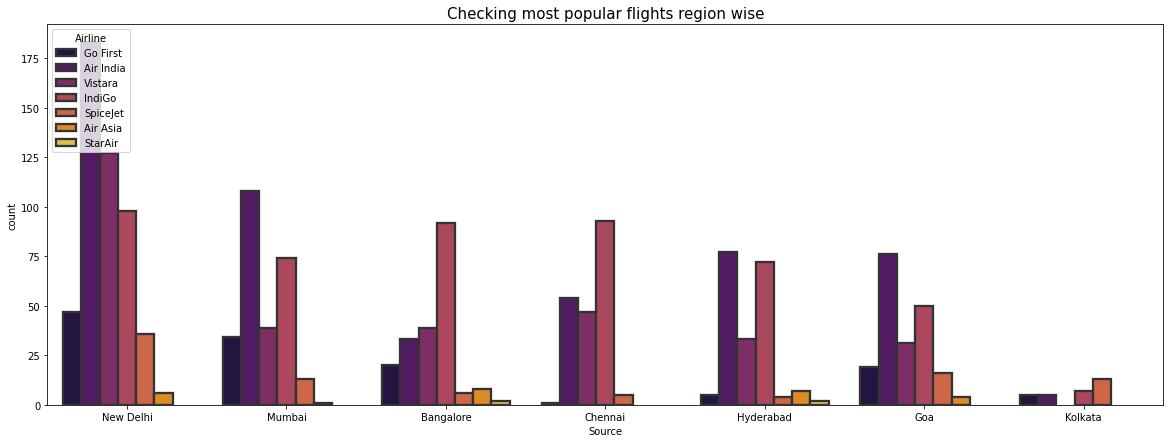

In [44]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

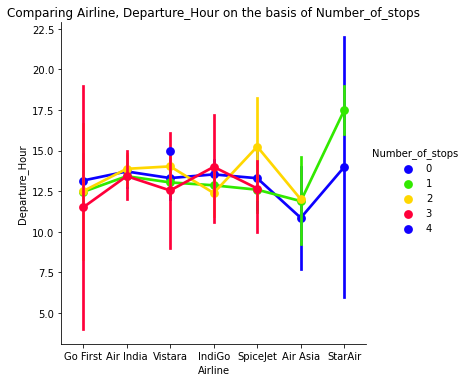

In [45]:
# Lets check the relation between independent variables
sns.factorplot(x= "Airline", y="Departure_Hour",hue="Number_of_stops",palette="prism", data=df)
plt.title("Comparing Airline, Departure_Hour on the basis of Number_of_stops")
plt.show()

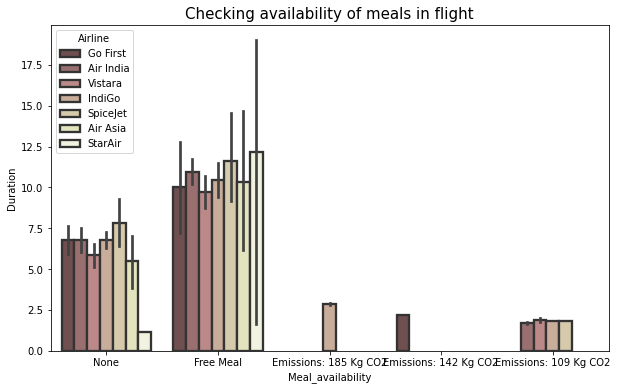

In [46]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(10,6))
sns.barplot(x = "Meal_availability", y = "Duration",hue="Airline",data = df, palette = "pink",linewidth=2.3, edgecolor=".2")
plt.title("Checking availability of meals in flight",fontsize=15)
plt.show()

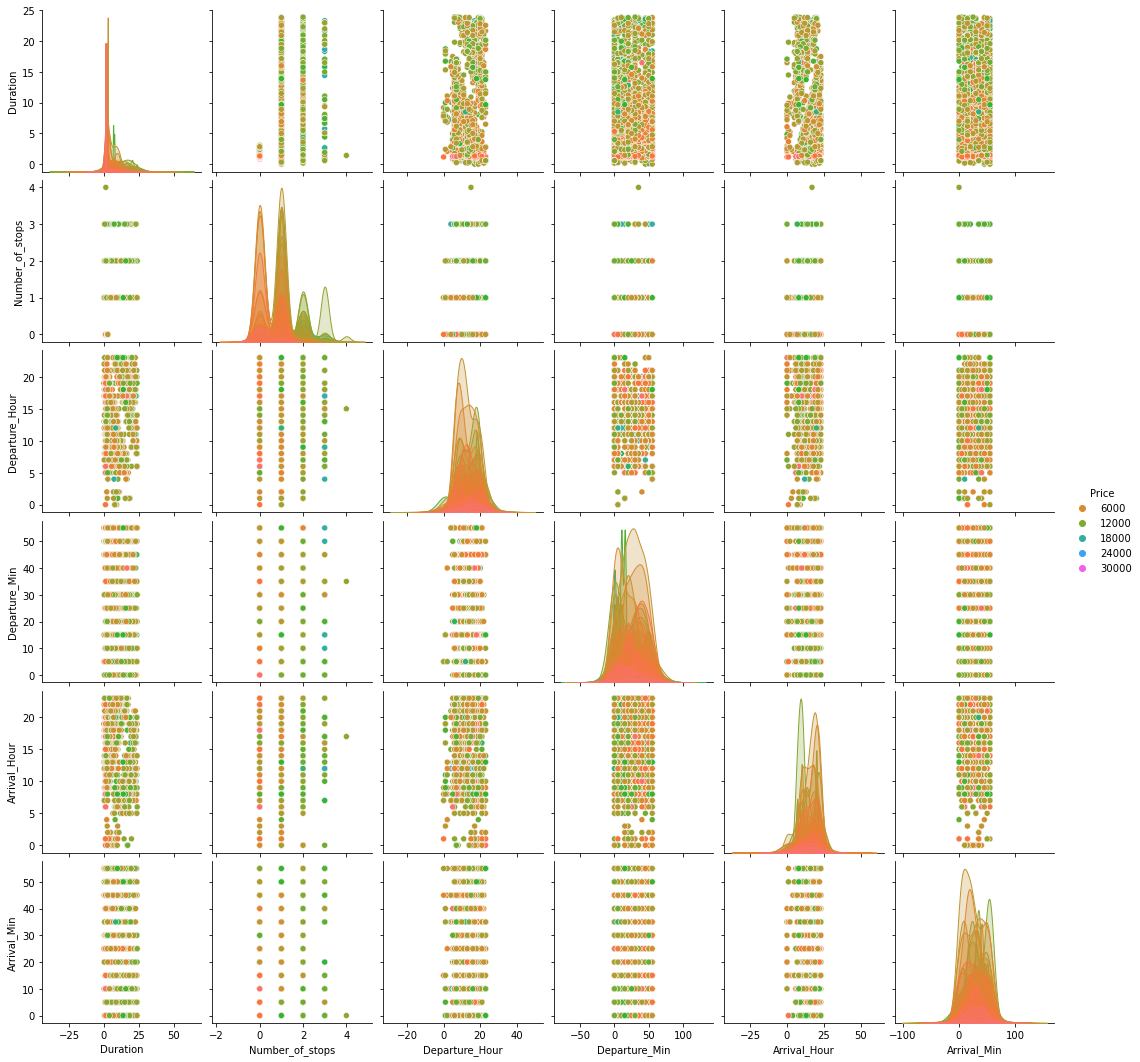

In [47]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

# Data Pre-processing
Identifying the outliers

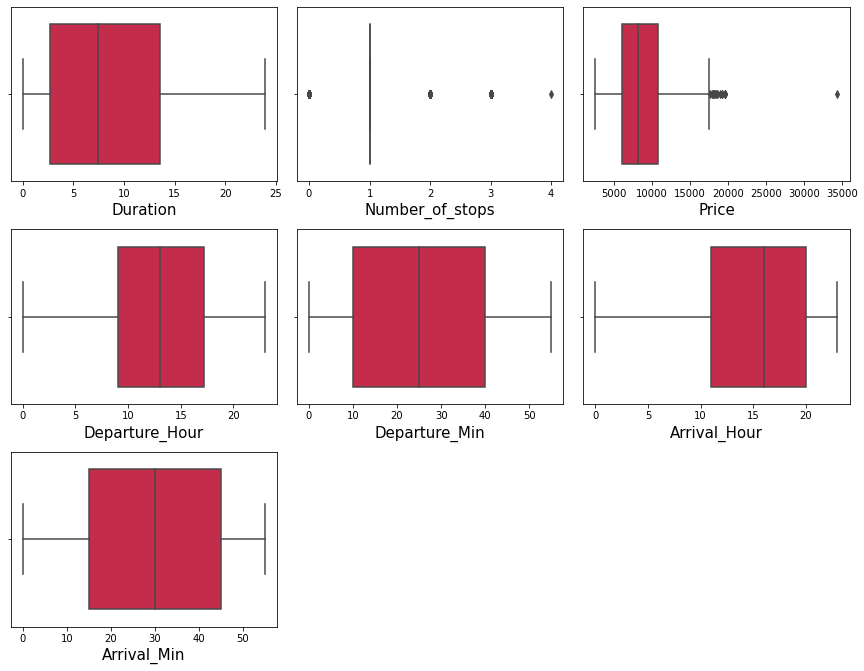

In [48]:
# Identifying the outliers using boxplot

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [49]:
# Checking the skewness
df.skew()

Duration           0.683841
Number_of_stops    0.581904
Price              0.952690
Departure_Hour    -0.039899
Departure_Min      0.169139
Arrival_Hour      -0.562589
Arrival_Min       -0.093685
dtype: float64

In [50]:
df["Duration"] = np.sqrt(df["Duration"])

In [51]:
# Again checking the skewness
df.skew()

Duration           0.147427
Number_of_stops    0.581904
Price              0.952690
Departure_Hour    -0.039899
Departure_Min      0.169139
Arrival_Hour      -0.562589
Arrival_Min       -0.093685
dtype: float64

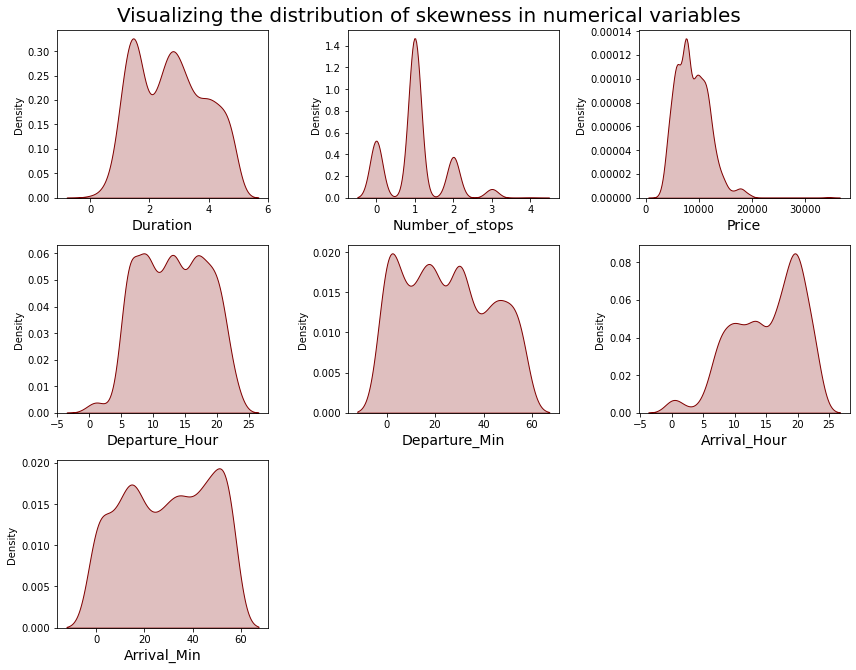

In [52]:
# Checking how the data has been distriubted after removing skewness in the column
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="maroon", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

In [53]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [54]:
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,2,1.471960,6,7,4,0,5954.0,8,45,10,55
1,2,1.471960,6,7,4,0,5954.0,22,30,0,40
2,2,1.500000,6,7,4,0,5954.0,14,20,16,35
3,2,1.500000,6,7,4,0,5954.0,21,0,23,15
4,2,2.432420,6,7,4,1,5954.0,13,45,19,40
...,...,...,...,...,...,...,...,...,...,...,...
1587,4,2.986079,4,7,4,1,7801.0,14,20,23,15
1588,1,1.658312,4,7,4,0,7958.0,23,50,2,35
1589,3,1.683251,4,7,4,0,7958.0,4,55,7,45
1590,3,1.683251,4,7,4,0,7958.0,16,30,19,20


In [55]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.047875,-0.032853,-0.028656,-0.003731,0.011243,0.028735,-0.006942,0.081592,0.023741,0.014503
Duration,-0.047875,1.000000,0.047391,-0.085339,-0.114816,0.460027,0.369203,0.073845,-0.032349,-0.118172,-0.005337
Source,-0.032853,0.047391,1.000000,-0.194378,-0.102469,0.095141,0.205660,0.100194,-0.038292,-0.014901,0.030037
Destination,-0.028656,-0.085339,-0.194378,1.000000,0.093466,-0.162397,-0.157727,-0.067229,0.022318,0.037005,-0.107438
Meal_availability,-0.003731,-0.114816,-0.102469,0.093466,1.000000,-0.209177,-0.364837,-0.098091,0.106999,0.071278,-0.036537
Number_of_stops,0.011243,0.460027,0.095141,-0.162397,-0.209177,1.000000,0.641918,0.003757,-0.080987,0.051542,-0.020131
Price,0.028735,0.369203,0.205660,-0.157727,-0.364837,0.641918,1.000000,0.023591,-0.108662,-0.053477,-0.006108
Departure_Hour,-0.006942,0.073845,0.100194,-0.067229,-0.098091,0.003757,0.023591,1.000000,0.027848,0.056065,0.035422
Departure_Min,0.081592,-0.032349,-0.038292,0.022318,0.106999,-0.080987,-0.108662,0.027848,1.000000,0.087177,0.062958
Arrival_Hour,0.023741,-0.118172,-0.014901,0.037005,0.071278,0.051542,-0.053477,0.056065,0.087177,1.000000,-0.001029


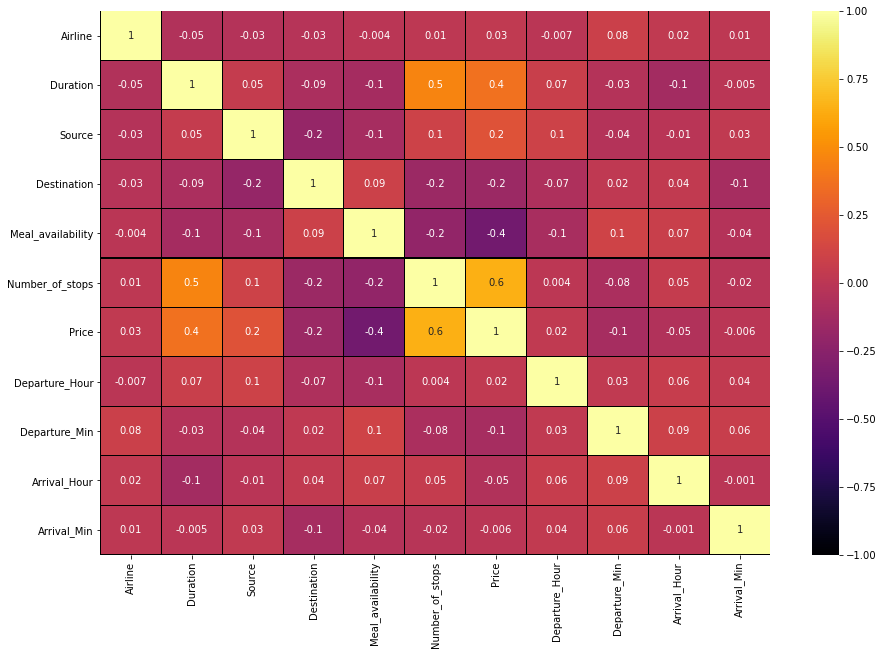

In [56]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="inferno")
plt.yticks(rotation=0);

In [57]:
cor['Price'].sort_values(ascending=False)

Price                1.000000
Number_of_stops      0.641918
Duration             0.369203
Source               0.205660
Airline              0.028735
Departure_Hour       0.023591
Arrival_Min         -0.006108
Arrival_Hour        -0.053477
Departure_Min       -0.108662
Destination         -0.157727
Meal_availability   -0.364837
Name: Price, dtype: float64

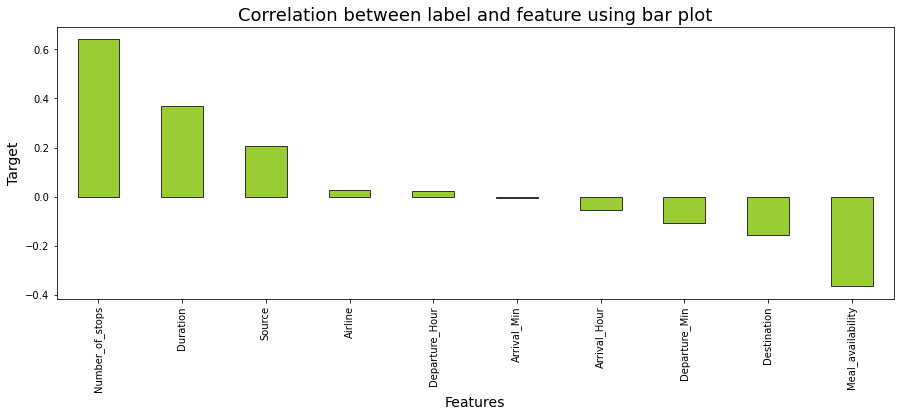

In [58]:
plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [59]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [60]:
# Dimension of x and y
x.shape, y.shape

((1592, 10), (1592,))

# Feature Scaling Using StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()


,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,-0.462636,-1.072293,1.102878,1.179142,0.985781,-1.417819,-1.002745,1.141694,-0.949801,1.442526
1,-0.462636,-1.072293,1.102878,1.179142,0.985781,-1.417819,1.697409,0.293416,-2.790438,0.604081
2,-0.462636,-1.048098,1.102878,1.179142,0.985781,-1.417819,0.154464,-0.272103,0.154581,0.324599
3,-0.462636,-1.048098,1.102878,1.179142,0.985781,-1.417819,1.504541,-1.403140,1.443027,-0.793328
4,-0.462636,-0.243537,1.102878,1.179142,0.985781,-0.008850,-0.038404,1.141694,0.706772,0.604081


# Building Machine Learning Models
Finding the Best Random State and Accuracy


In [62]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7890850882931119  on Random_state  124


In [63]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Number_of_stops,0.382
Meal_availability,0.141
Duration,0.093
Source,0.078
Destination,0.077
Arrival_Min,0.054
Departure_Hour,0.048
Departure_Min,0.047
Arrival_Hour,0.041


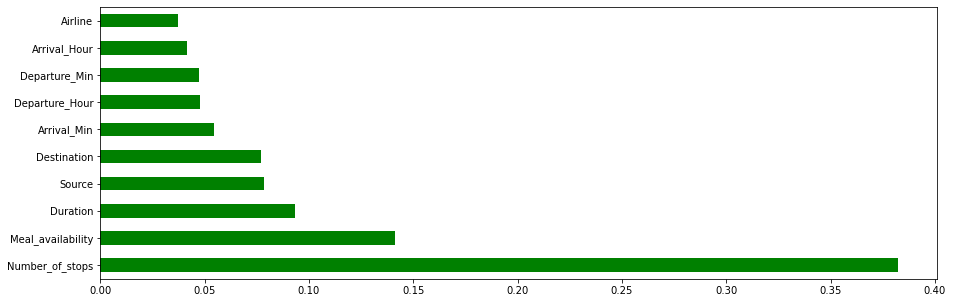

In [64]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

R2_Score: 29.035127986010835
Mean Absolute Error: 1201.7018828451883
Mean Squared Error: 6017052.387552301
Root Mean Squared Error: 2452.968077157202


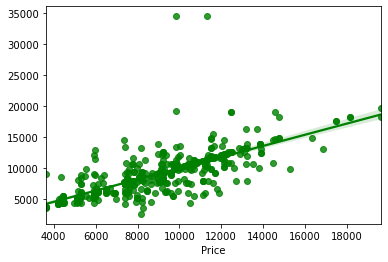

In [67]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

R2_Score: 73.90602659967004
Mean Absolute Error: 1026.0948953974896
Mean Squared Error: 2212486.2695198082
Root Mean Squared Error: 1487.4428626067652


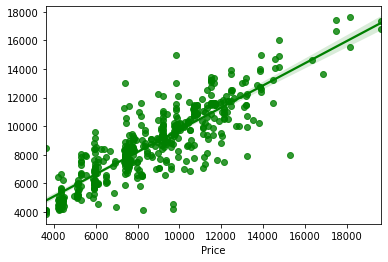

In [68]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

R2_Score: 76.63009822962118
Mean Absolute Error: 908.6523221757323
Mean Squared Error: 1981514.5050441422
Root Mean Squared Error: 1407.6627810111845


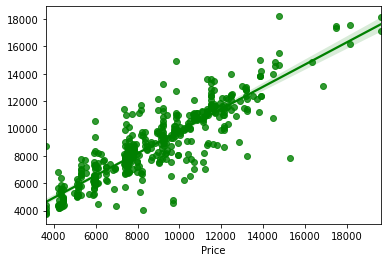

In [69]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

R2_Score: 68.36023919695215
Mean Absolute Error: 1233.2041554386356
Mean Squared Error: 2682708.9640073464
Root Mean Squared Error: 1637.8977269681238


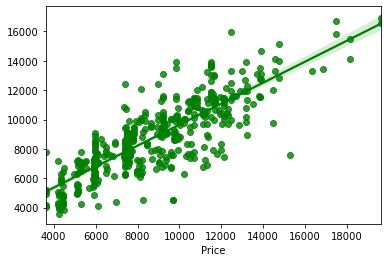

In [70]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

R2_Score: 68.382697305408
Mean Absolute Error: 1135.891465191063
Mean Squared Error: 2680804.759697958
Root Mean Squared Error: 1637.316328538245


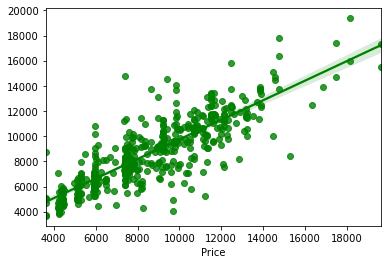

In [71]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

R2_Score: 68.78276774487604
Mean Absolute Error: 1120.5791126220363
Mean Squared Error: 2646883.1203759606
Root Mean Squared Error: 1626.9244359760414


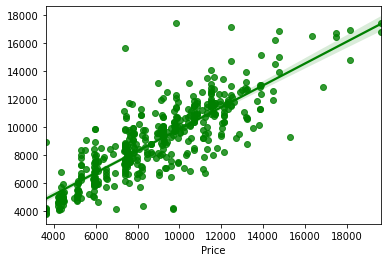

In [72]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

# Model Selection
From the above created models, Extra Trees Regressor algorithm has high R2 score and less RMSE value. So, we can conclude that "Extra Trees Regressor" as the best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

# Hyper Parameter Tuning

In [73]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

In [74]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [75]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

In [76]:
# Finding best parameters
GCV.best_params_


{'criterion': 'mae',
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 100,
 'n_jobs': -2}

R2_Score: 76.50041232941405
Mean absolute error: 879.8627635983264
Mean squared error: 1992510.4645002426
Root Mean Squared error: 1411.563128060606


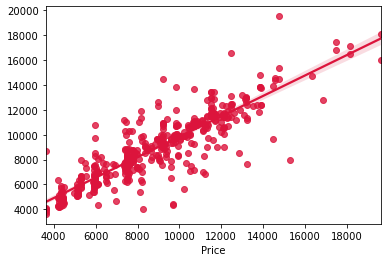

In [77]:
# Creating final model
Flight_price_model = ExtraTreesRegressor(criterion='mae',max_features='auto',min_samples_split=3,n_estimators=1000,n_jobs=-1)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

# Saving the Final model

In [78]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"Flight_Ticket_Price_Prediction.pkl")

['Flight_Ticket_Price_Prediction.pkl']

# Loading the saved model and predicting Flight Ticket Price

In [79]:
# Loading the saved model
Model=joblib.load("Flight_Ticket_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 6060.6085,  9653.7725,  8334.8865,  8165.2315, 17462.    ,
       10358.016 ,  4360.5215,  6663.7665,  6191.0765,  3747.237 ,
        5305.4715,  5191.858 , 10701.3545,  7684.54  ,  7423.5315,
       12425.211 ,  8553.595 ,  6090.979 , 13448.2295, 10687.207 ,
        7458.0045,  4908.184 ,  9902.513 , 10950.7585, 12930.517 ,
        5284.5765, 11659.5265,  7433.482 ,  7869.923 ,  7562.478 ,
        8719.405 ,  6123.0595,  6333.277 ,  6689.335 ,  9357.284 ,
        9025.5805, 12028.8725, 12912.319 ,  8167.843 ,  7829.148 ,
        9730.2145, 10882.736 ,  7944.383 ,  6810.6565, 10081.03  ,
        5139.184 ,  8510.397 , 13180.2085,  5388.1545, 11432.7655,
        6548.518 ,  8958.5555,  6369.623 ,  9266.5675,  7530.4425,
        4599.6325,  6829.5125, 11139.6105,  8207.925 , 11028.168 ,
       11144.0695,  4648.399 ,  9043.7805,  9728.848 ,  5094.993 ,
        7712.5045, 13131.9765,  8384.4   , 11030.2605,  4065.807 ,
        8331.157 ,  9900.4795, 10721.99  , 13866.    , 11684.6

In [80]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
Predicted_Flight_Ticket_Price

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
Predicted,6060.6085,9653.7725,8334.8865,8165.2315,17462.0,10358.016,4360.5215,6663.7665,6191.0765,3747.237,...,10843.0,9126.9155,5686.4795,6259.731,7329.9735,6048.91,18054.292,12406.569,7087.1205,4592.5605
Actual,5293.0000,9768.0000,9915.0000,7489.0000,17462.0,11129.000,6092.0000,7530.0000,5954.0000,3636.000,...,10843.0,8641.0000,5943.0000,5943.000,6025.0000,5976.00,19619.000,13874.000,6060.0000,4262.0000


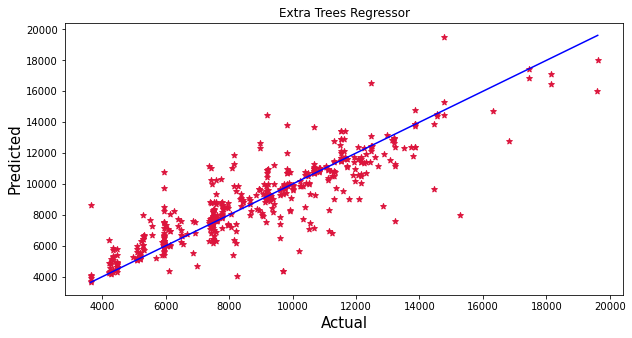

In [81]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Extra Trees Regressor")
plt.show()

In [82]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("Predicted_Flight_Ticket_Price.csv",index=False)